In [26]:
import pandas as pd
from google.colab import files
import seaborn as sns
from seaborn import objects as so

#creating the dataframes from csv files downloaded from berlin.de/umweltatlas/

file11 = '/content/drive/MyDrive/Ironhack/Week 3/Quest/Berlin_enviromental_justice_2011 - BEJ_2011.csv' #get a local file path
file13 = '/content/drive/MyDrive/Ironhack/Week 3/Quest/BER_environmental_justice_2013.csv'
df11 = pd.read_csv(file11)
df13 = pd.read_csv(file13)


#--- Prepering the tables for merging ---

In [27]:
#--- the 2013 table ---
#removing unnecessery columns
df13.drop("geometry",axis=1, inplace=True, errors='ignore') #if columns exist it will be dropped

#aligning the column names
df13.rename(columns={'planing_area_name': 'area_name', 'Noise':'noise_13', 'Air Pollution (PM2.5 + NO2)':'air_pollution_13','Grean area supply':'green_area_13','Bioclimatic Stress':'bioclimatic_stress_13','Social Status':'social_status_13','population':'population_13'},inplace=True,errors='ignore')

#sorting and aligning the column and position
df13 = df13.reindex(sorted(df13.columns), axis=1)
col = df13.pop('area_name')
df13.insert(0, col.name, col)
col = df13.pop('population_13')
df13.insert(1, col.name, col)

#removing rows where population is zero

df13.drop(df13.loc[df13['population_13'] == 0].index ,inplace=True)


In [28]:
#--- the 2011 table ---
#aligning the column names
df11.rename(columns={'population_2011':'population_11','green_area':'green_area_11','noise':'noise_11','air_polution':'air_pollution_11','social_status':'social_status_11','bioclimatic_stress':'bioclimatic_stress_11'},inplace=True,errors='ignore')

#sorting and aligning the column and position
df11 = df11.reindex(sorted(df11.columns), axis=1)
col = df11.pop('area_name')
df11.insert(0, col.name, col)
col = df11.pop('population_11')
df11.insert(1, col.name, col)

#removing rows where population is zero

df11.drop(df11.loc[df11['population_11'] == 0].index ,inplace=True)



In [29]:
#downloading clean tables as csv
'''
df11.to_csv("df11.csv")
files.download("df11.csv")

df13.to_csv("df13.csv")
files.download("df13.csv")
'''

'\ndf11.to_csv("df11.csv")\nfiles.download("df11.csv")\n\ndf13.to_csv("df13.csv")\nfiles.download("df13.csv")\n'

#Functions

In [30]:
#defining helper functions

def percentileMap(value_to_check, percentile_25,percentile_50,percentile_75):
  n = value_to_check
  if n < percentile_25: #values smaller than this should be mapped to 1
    return 1
  if percentile_25 <= n < percentile_50: #values smaller than this but bigger than the .25 should be mapped to 2
    return 2
  if percentile_50 <= n < percentile_75: #values smaller than this but bigger than the .5 should be mapped to 3
    return 3
  if n > percentile_75: #values larger then this should be mapped to 4
    return 4

In [43]:
df11

,area_name,population_11,air_pollution,bioclimatic_stress_11,green_area_11,noise_11,social_status_11
0,Stülerstraße,"2,765",3,3,1,2,2
1,Großer Tiergarten,176,3,2,3,0,1
2,Lützowstraße,"4,768",3,3,1,2,2
3,Körnerstraße,"3,809",3,3,2,2,3
4,Nördlicher Landwehrkanal,901,3,3,3,2,1
...,...,...,...,...,...,...,...
442,Dannenwalder Weg,9008,3,3,1,2,3
443,Lübarser Straße,3164,2,2,3,2,2
444,Rollbergesiedlung,4973,2,2,3,1,2
445,Borsigwalde,6323,2,3,2,2,2


# Visualisations

(1.0, 4.0)

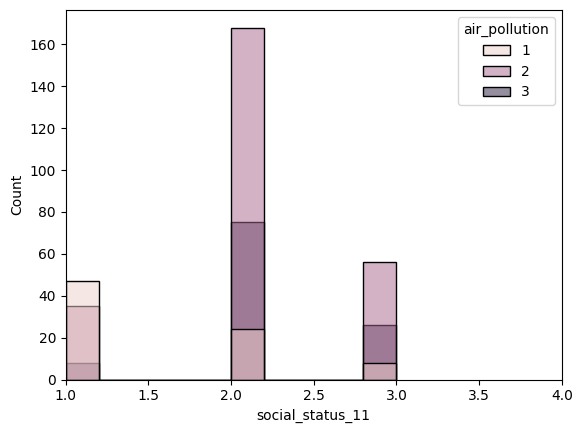

In [44]:
import matplotlib.pyplot as plt

#plot social status and air_pollution
p11 = sns.histplot(df11,  x="social_status_11", hue="air_pollution")
plt.xlim(1,4)

(1.0, 4.0)

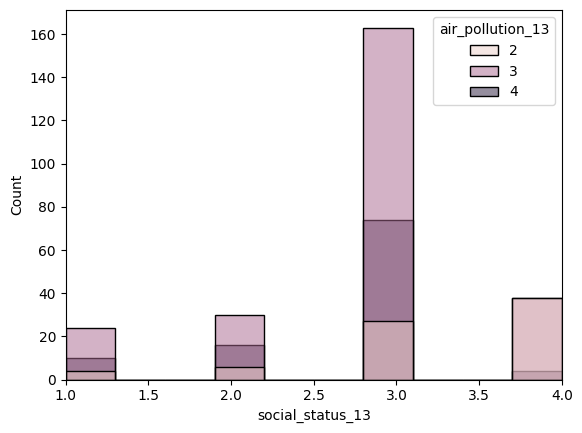

In [41]:
p13 = sns.histplot(df13,  x="social_status_13", hue="air_pollution_13")
plt.xlim(1,4)

(1.0, 4.0)

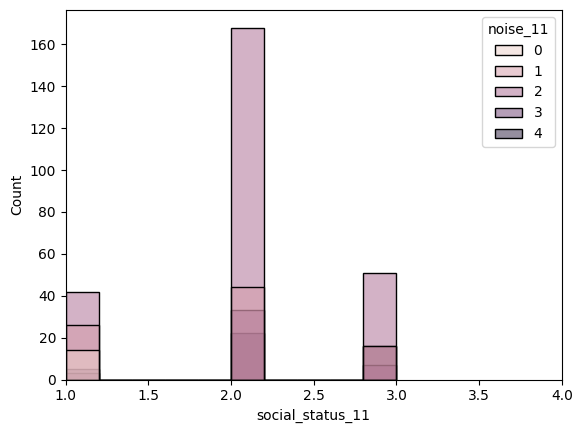

In [37]:
#plot social status and noise
p11 = sns.histplot(df11,  x="social_status_11", hue="noise_11")
plt.xlim(1,4)

(1.0, 4.0)

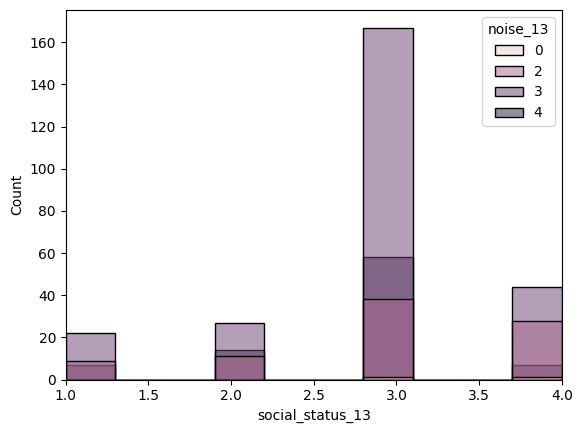

In [38]:
p13 = sns.histplot(df13,  x="social_status_13", hue="noise_13")
plt.xlim(1,4)